# Final Project Big Data - Classification

### Apache Spark with Deep Learning Algorithm using BigDL DLlib

- Name: Kurnia Cahya Febryanto
- Student ID: 5025201073
- Class: Big Data A

## Table of Contents
1. [Dataset Description](#dataset-description)
   - [Source of the Dataset](#source-of-the-dataset)
   - [Description of the Dataset](#description-of-the-dataset)
2. [Data Acquisition](#data-acquisition)
   - [Setting Up Kaggle API](#setting-up-kaggle-api)
   - [Downloading Dataset](#downloading-dataset)
3. [Setting Up the Environment](#setting-up-the-environment)
   - [Installation of Dependencies](#installation-of-dependencies)
4. [Data Loading and Exploration](#data-loading-and-exploration)
   - [Loading Dataset into Spark DataFrame](#loading-dataset-into-spark-dataframe)
   - [Initial Data Exploration](#initial-data-exploration)
5. [Data Preprocessing](#data-preprocessing)
   - [Handling Missing Values](#handling-missing-values)
   - [Feature Scaling/Normalization](#feature-scalingnormalization)
6. [Feature Engineering](#feature-engineering)
   - [Feature Selection](#feature-selection)
   - [Feature Preparation](#feature-preparation)
7. [Model Building](#model-building)
   - [Deep Learning Model Creation using BigDL DLlib](#deep-learning-model-creation-using-bigdl-dllib)
8. [Parameter Tuning](#parameter-tuning)
   - [Initial Model Training](#initial-model-training)
   - [Hyperparameter Tuning](#hyperparameter-tuning)
   - [Retraining Model with Optimized Parameters](#retraining-model-with-optimized-parameters)
9. [Model Evaluation](#model-evaluation)
   - [Accuracy](#accuracy)
   - [Confusion Matrix](#confusion-matrix)
   - [Precision, Recall, and F1 Score](#precision-recall-f1-score)
10. [Visualization](#visualization)
    - [Data Visualization during Preprocessing](#data-visualization-during-preprocessing)
    - [Data Visualization during Evaluation](#data-visualization-during-evaluation)
11. [Conclusion](#conclusion)
12. [References](#references)

## Dataset Description <a name="dataset-description"></a>

### Source of the Dataset <a name="source-of-the-dataset"></a>

The dataset used in this project is obtained from Kaggle. It is the "Hotel Reservations Classification Dataset" and can be found at [Hotel Reservation Dataset](https://www.kaggle.com/ahsan81/hotel-reservations-classification-dataset).


### Description of the Dataset <a name="description-of-the-dataset"></a>

The `Hotel Reservations Classification Dataset` provides data pertaining to hotel reservations, which includes a variety of factors such as booking changes, deposit type, days in waiting list, and other customer details.

With the advent of online hotel reservation channels, booking behaviors of customers have significantly evolved. However, a substantial number of these reservations get cancelled or result in no-shows due to various reasons like change of plans or scheduling conflicts. While the option to cancel free of charge or at a low cost is advantageous for hotel guests, it often results in potential revenue loss for hotels.

Therefore, the objective of this project is to use this dataset to build a machine learning model that can predict whether a hotel booking will be cancelled or not. This information can potentially help hotels in better managing their resources and maximizing their revenues.

## Data Acquisition <a name="data-acquisition"></a>

### Setting Up Kaggle API <a name="setting-up-kaggle-api"></a>

To utilize Kaggle's datasets directly, we need to setup Kaggle API. You can download your kaggle.json file
from your Kaggle account settings page. The kaggle.json file is a token that connects the API to your account.

Steps to upload kaggle.json in Google Colab:
1. Run the code cell below.
2. A `Choose Files` button will appear. Click on it.
3. Navigate to the location of your kaggle.json file and select it.

In [1]:
# Import necessary library
from google.colab import files

In [2]:
# Upload kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kurniacahyaf","key":"e3f28eef4d71d12989a5e93314b3e05b"}'}

In [3]:
# Make directory named kaggle and copy kaggle.json file there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change the permissions of the file.
!chmod 600 ~/.kaggle/kaggle.json

### Downloading Dataset <a name="downloading-dataset"></a>

After setting up the Kaggle API, we can now download our dataset. We will download the `Hotel Reservations Classification Dataset` from Kaggle. The dataset will be downloaded as a zip file. We will need to unzip the file to extract the data.

In [4]:
# Installation of Kaggle Package
!pip install -q kaggle

In [5]:
# Now we can import the dataset
!kaggle datasets download -d ahsan81/hotel-reservations-classification-dataset

  0% 0.00/480k [00:00<?, ?B/s]
100% 480k/480k [00:00<00:00, 178MB/s]


In [6]:
# The dataset is downloaded as a zip file, we need to unzip it
!unzip \*.zip  && rm *.zip

Archive:  hotel-reservations-classification-dataset.zip
  inflating: Hotel Reservations.csv  


In [7]:
# Check if the dataset has been unzipped successfully
!ls

'Hotel Reservations.csv'   kaggle.json	 sample_data


## Setting Up the Environment <a name="setting-up-the-environment"></a>

Before we start our data analysis, we need to set up our environment. We are using Google Colab which is a free cloud service. We will install all the required dependencies including Apache Spark. We also need to install PySpark, which is the Python library for Spark.


### Installation of Dependencies <a name="installation-of-dependencies"></a>

The dependencies we need to install include pandas, numpy, matplotlib and seaborn for data manipulation and visualization. We also need to install pyspark which is the Python library for Spark and Bigdl.


In [8]:
!pip install --pre --upgrade bigdl-dllib-spark3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.0/214.0 MB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.7/51.7 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 22.5 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.1.3-py2.py3-none-any.whl size=214463469 sha256=72a769cf18f2bc674e4fbdd46f9141b58f5740e05d260fec6d347f2f8e4d6917
  Stored in directory: /root/.cache/pip/wheels/b0/d0/fd/b0e0165f0fbd79838d2f50c544382e7a5346274f0af07ffada
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [9]:
from pyspark.sql import SparkSession
from pyspark.sql.types import DoubleType
from pyspark.sql.functions import lit
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

from bigdl.dllib.nncontext import *
from bigdl.dllib.keras.layers import *
from bigdl.dllib.keras.models import *
import bigdl.dllib.keras.Sequential
from bigdl.dllib.nnframes import *
from bigdl.dllib.nn.criterion import *

In [10]:
sc = init_nncontext(cluster_mode="local") # run in local mode
spark = SparkSession(sc)

Current pyspark location is : /usr/local/lib/python3.10/dist-packages/pyspark/__init__.py
Start to getOrCreate SparkContext
pyspark_submit_args is:  --driver-class-path /usr/local/lib/python3.10/dist-packages/bigdl/share/dllib/lib/bigdl-dllib-spark_3.1.3-2.4.0-SNAPSHOT-jar-with-dependencies.jar:/usr/local/lib/python3.10/dist-packages/bigdl/share/core/lib/all-2.4.0-20230420.050641-1.jar pyspark-shell 
Successfully got a SparkContext


## Data Loading and Exploration <a name="data-loading-and-exploration"></a>


Data Loading and Exploration <a name="data-loading-and-exploration"></a>
In this step, we will load the dataset into a Spark DataFrame and perform some initial explorations.

### Loading Dataset into Spark DataFrame <a name="loading-dataset-into-spark-dataframe"></a>

In [261]:
# Path to the dataset
data_path = "Hotel Reservations.csv"

# Load the data into a DataFrame
df = spark.read.format('csv')\
      .option('header', 'true')\
      .option('inferSchema', 'true')\
      .load(data_path)

In [220]:
df.show(5)

+----------+------------+--------------+--------------------+-----------------+-----------------+--------------------------+------------------+---------+------------+-------------+------------+-------------------+--------------+----------------------------+------------------------------------+------------------+----------------------+--------------+
|Booking_ID|no_of_adults|no_of_children|no_of_weekend_nights|no_of_week_nights|type_of_meal_plan|required_car_parking_space|room_type_reserved|lead_time|arrival_year|arrival_month|arrival_date|market_segment_type|repeated_guest|no_of_previous_cancellations|no_of_previous_bookings_not_canceled|avg_price_per_room|no_of_special_requests|booking_status|
+----------+------------+--------------+--------------------+-----------------+-----------------+--------------------------+------------------+---------+------------+-------------+------------+-------------------+--------------+----------------------------+------------------------------------+--

### Initial Data Exploration <a name="initial-data-exploration"></a>

Let's perform some initial data exploration to better understand our data.

In [13]:
# Print the schema of the DataFrame
df.printSchema()

root
 |-- Booking_ID: string (nullable = true)
 |-- no_of_adults: integer (nullable = true)
 |-- no_of_children: integer (nullable = true)
 |-- no_of_weekend_nights: integer (nullable = true)
 |-- no_of_week_nights: integer (nullable = true)
 |-- type_of_meal_plan: string (nullable = true)
 |-- required_car_parking_space: integer (nullable = true)
 |-- room_type_reserved: string (nullable = true)
 |-- lead_time: integer (nullable = true)
 |-- arrival_year: integer (nullable = true)
 |-- arrival_month: integer (nullable = true)
 |-- arrival_date: integer (nullable = true)
 |-- market_segment_type: string (nullable = true)
 |-- repeated_guest: integer (nullable = true)
 |-- no_of_previous_cancellations: integer (nullable = true)
 |-- no_of_previous_bookings_not_canceled: integer (nullable = true)
 |-- avg_price_per_room: double (nullable = true)
 |-- no_of_special_requests: integer (nullable = true)
 |-- booking_status: string (nullable = true)



In [14]:
# Print the number of rows and columns
print(f"Number of rows: {df.count()}")
print(f"Number of columns: {len(df.columns)}")

Number of rows: 36275
Number of columns: 19


In [15]:
# Print summary statistics
df.describe().show()

+-------+----------+------------------+-------------------+--------------------+------------------+-----------------+--------------------------+------------------+-----------------+------------------+------------------+------------------+-------------------+-------------------+----------------------------+------------------------------------+------------------+----------------------+--------------+
|summary|Booking_ID|      no_of_adults|     no_of_children|no_of_weekend_nights| no_of_week_nights|type_of_meal_plan|required_car_parking_space|room_type_reserved|        lead_time|      arrival_year|     arrival_month|      arrival_date|market_segment_type|     repeated_guest|no_of_previous_cancellations|no_of_previous_bookings_not_canceled|avg_price_per_room|no_of_special_requests|booking_status|
+-------+----------+------------------+-------------------+--------------------+------------------+-----------------+--------------------------+------------------+-----------------+---------------

In [16]:
# Print the distribution of the target variable
df.groupBy('booking_status').count().show()

+--------------+-----+
|booking_status|count|
+--------------+-----+
|  Not_Canceled|24390|
|      Canceled|11885|
+--------------+-----+



## Data Preprocessing <a name="data-preprocessing"></a>

### Handling Missing Values <a name="handling-missing-values"></a>

In this step, we are going to handle missing values if any. We'll use Spark's DataFrame API's fillna function. Here we're assuming that you want to fill the numerical column missing values with the mean of their respective columns, and the categorical column missing values with the mode of their respective columns.

In [17]:
# Importing necessary libraries
from pyspark.sql.functions import mean
from pyspark.sql.functions import mean, when, isnan, col, count
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline

Then, fill the missing values:

In [18]:
numerical_columns = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
                     'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month',
                     'arrival_date', 'repeated_guest', 'no_of_previous_cancellations',
                     'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

categorical_columns = ['type_of_meal_plan', 'room_type_reserved', 'booking_status']

In [19]:
print(df.columns)

['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'booking_status']


In [20]:
# Handling missing values for numerical columns
for column in numerical_columns:
    mean_value = df.select(mean(df[column])).collect()[0][0]
    df = df.fillna(mean_value, subset=[column])

In [21]:
# Handling missing values for categorical columns
for column in categorical_columns:
    mode_value = df.filter(df[column].isNotNull()).groupBy(column).count().orderBy('count', ascending=False).first()[0]
    df = df.fillna(mode_value, subset=[column])

In [22]:
# Assuming 'type_of_meal_plan' and 'room_type_reserved' are categorical columns with missing values
mode_type_of_meal_plan = df.filter(df.type_of_meal_plan.isNotNull()).groupBy("type_of_meal_plan").count().orderBy('count', ascending=False).first()[0]
mode_room_type_reserved = df.filter(df.room_type_reserved.isNotNull()).groupBy("room_type_reserved").count().orderBy('count', ascending=False).first()[0]

df = df.fillna(mode_type_of_meal_plan, subset=['type_of_meal_plan'])
df = df.fillna(mode_room_type_reserved, subset=['room_type_reserved'])

In [23]:
# Check again for missing values
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+----------+------------+--------------+--------------------+-----------------+-----------------+--------------------------+------------------+---------+------------+-------------+------------+-------------------+--------------+----------------------------+------------------------------------+------------------+----------------------+--------------+
|Booking_ID|no_of_adults|no_of_children|no_of_weekend_nights|no_of_week_nights|type_of_meal_plan|required_car_parking_space|room_type_reserved|lead_time|arrival_year|arrival_month|arrival_date|market_segment_type|repeated_guest|no_of_previous_cancellations|no_of_previous_bookings_not_canceled|avg_price_per_room|no_of_special_requests|booking_status|
+----------+------------+--------------+--------------------+-----------------+-----------------+--------------------------+------------------+---------+------------+-------------+------------+-------------------+--------------+----------------------------+------------------------------------+--

### Feature Scaling/Normalization <a name="feature-scalingnormalization"></a>

In this step, we'll normalize the features so that they are on the same scale. This is particularly important for deep learning models, as it can help the model converge faster and can also help avoid local minima. Here, we'll use the MinMaxScaler from the pyspark.ml.feature module to scale the features between 0 and 1.

In [24]:
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import VectorAssembler

In [25]:
# Define the columns you want to scale
input_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
              'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month',
              'arrival_date', 'repeated_guest', 'no_of_previous_cancellations',
              'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

In [26]:
# Drop the existing 'features' column if it already exists
if 'features' in df.columns:
    df = df.drop('features')

# Initialize the VectorAssembler
assembler = VectorAssembler(inputCols=input_cols, outputCol="features")

# Transform the DataFrame
df = assembler.transform(df)

In [27]:
# Initialize the `MinMaxScaler`
scaler = MinMaxScaler(inputCol="features", outputCol="scaled_features")

# Now you can fit your scaler
scalerModel = scaler.fit(df)

# And transform the DataFrame
scaled_df = scalerModel.transform(df)

In [28]:
scaled_df.show(5)

+----------+------------+--------------+--------------------+-----------------+-----------------+--------------------------+------------------+---------+------------+-------------+------------+-------------------+--------------+----------------------------+------------------------------------+------------------+----------------------+--------------+--------------------+--------------------+
|Booking_ID|no_of_adults|no_of_children|no_of_weekend_nights|no_of_week_nights|type_of_meal_plan|required_car_parking_space|room_type_reserved|lead_time|arrival_year|arrival_month|arrival_date|market_segment_type|repeated_guest|no_of_previous_cancellations|no_of_previous_bookings_not_canceled|avg_price_per_room|no_of_special_requests|booking_status|            features|     scaled_features|
+----------+------------+--------------+--------------------+-----------------+-----------------+--------------------------+------------------+---------+------------+-------------+------------+-------------------

## Feature Engineering <a name="feature-engineering"></a>

Feature engineering involves preparing the proper input dataset, compatible with the machine learning algorithm requirements. This involves creating new features from existing ones which can add more value to our model.

In [29]:
from pyspark.ml.feature import OneHotEncoder, StandardScaler
from pyspark.sql.functions import col

### Feature Selection <a name="feature-selection"></a>

Not all features are equally important. Some features do not contribute much and can be dropped, while others may need to be transformed or engineered.

In this step, we will only take the numerical columns. However, in a real-world scenario, categorical columns can be encoded and used as features too.

In [30]:
df.printSchema()

root
 |-- Booking_ID: string (nullable = true)
 |-- no_of_adults: integer (nullable = true)
 |-- no_of_children: integer (nullable = true)
 |-- no_of_weekend_nights: integer (nullable = true)
 |-- no_of_week_nights: integer (nullable = true)
 |-- type_of_meal_plan: string (nullable = false)
 |-- required_car_parking_space: integer (nullable = true)
 |-- room_type_reserved: string (nullable = false)
 |-- lead_time: integer (nullable = true)
 |-- arrival_year: integer (nullable = true)
 |-- arrival_month: integer (nullable = true)
 |-- arrival_date: integer (nullable = true)
 |-- market_segment_type: string (nullable = true)
 |-- repeated_guest: integer (nullable = true)
 |-- no_of_previous_cancellations: integer (nullable = true)
 |-- no_of_previous_bookings_not_canceled: integer (nullable = true)
 |-- avg_price_per_room: double (nullable = false)
 |-- no_of_special_requests: integer (nullable = true)
 |-- booking_status: string (nullable = false)
 |-- features: vector (nullable = true)

In [31]:
# Feature Selection
selected_columns = ['type_of_meal_plan', 'room_type_reserved', 'booking_status',
                    'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
                    'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month',
                    'arrival_date', 'repeated_guest', 'no_of_previous_cancellations',
                    'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests',
                    'class']

In [32]:
df.show(5)

+----------+------------+--------------+--------------------+-----------------+-----------------+--------------------------+------------------+---------+------------+-------------+------------+-------------------+--------------+----------------------------+------------------------------------+------------------+----------------------+--------------+--------------------+
|Booking_ID|no_of_adults|no_of_children|no_of_weekend_nights|no_of_week_nights|type_of_meal_plan|required_car_parking_space|room_type_reserved|lead_time|arrival_year|arrival_month|arrival_date|market_segment_type|repeated_guest|no_of_previous_cancellations|no_of_previous_bookings_not_canceled|avg_price_per_room|no_of_special_requests|booking_status|            features|
+----------+------------+--------------+--------------------+-----------------+-----------------+--------------------------+------------------+---------+------------+-------------+------------+-------------------+--------------+--------------------------

### Feature Preparation <a name="feature-preparation"></a>

Since we have some categorical columns and our deep learning model expects input as numerical data, we need to convert these categorical columns to numerical ones. We can use a technique called one-hot encoding.

Also, we need to assemble all our features into a single column. We can do that using VectorAssembler from PySpark.

In [33]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql.functions import col

In [154]:
# Convert the columns to string type if they are not already
df = df.withColumn('type_of_meal_plan', col('type_of_meal_plan').cast('string'))
df = df.withColumn('room_type_reserved', col('room_type_reserved').cast('string'))

In [35]:
# Apply StringIndexer to multiple columns in a PySpark DataFrame
indexers = [StringIndexer(inputCol=c, outputCol="{0}_indexed".format(c)) for c in categorical_columns]

# Apply OneHotEncoder to multiple columns in a PySpark DataFrame
encoders = [OneHotEncoder(inputCol=indexer.getOutputCol(),
                          outputCol="{0}_encoded".format(indexer.getOutputCol()))
            for indexer in indexers]

In [37]:
feature_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
                'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month',
                'arrival_date', 'repeated_guest', 'no_of_previous_cancellations',
                'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

In [152]:
# Vector assembling
assembler = VectorAssembler(
    inputCols=[encoder.getOutputCol() for encoder in encoders] + feature_cols,
    outputCol="features"
)

In [162]:
df = df.drop("features", "type_of_meal_plan_index", "room_type_reserved_index", "booking_status_index", "type_of_meal_plan_indexed_encoded", "room_type_reserved_indexed_encoded", "booking_status_indexed_encoded")
pipeline = Pipeline(stages=indexers + encoders + [assembler])
df = pipeline.fit(df).transform(df)

In [227]:
df.show(5)

+----------+------------+--------------+--------------------+-----------------+-----------------+--------------------------+------------------+---------+------------+-------------+------------+-------------------+--------------+----------------------------+------------------------------------+------------------+----------------------+--------------+
|Booking_ID|no_of_adults|no_of_children|no_of_weekend_nights|no_of_week_nights|type_of_meal_plan|required_car_parking_space|room_type_reserved|lead_time|arrival_year|arrival_month|arrival_date|market_segment_type|repeated_guest|no_of_previous_cancellations|no_of_previous_bookings_not_canceled|avg_price_per_room|no_of_special_requests|booking_status|
+----------+------------+--------------+--------------------+-----------------+-----------------+--------------------------+------------------+---------+------------+-------------+------------+-------------------+--------------+----------------------------+------------------------------------+--

## Model Building <a name="model-building"></a>

After we have prepared the data, we can now proceed to build our deep learning model using BigDL DLlib. In this step, we will define the architecture of the model, compile it, and then train it with our prepared data.

### Deep Learning Model Creation using BigDL DLlib <a name="deep-learning-model-creation-using-bigdl-dllib"></a>

We'll use DLlib's Keras-style API to define our model. For this tutorial, we'll use a simple feed-forward neural network with several dense layers. Let's get started.

In [125]:
# Import the necessary libraries
from bigdl.dllib.keras.models import Sequential
from bigdl.dllib.keras.layers import Dense
from bigdl.dllib.keras.optimizers import Adam
from bigdl.dllib.nnframes import NNClassifier
from bigdl.dllib.nn.criterion import CrossEntropyCriterion
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import lit

In [49]:
# Initialize NNContext and create Spark session
sc = init_nncontext(cluster_mode="local") # run in local mode
spark = SparkSession(sc)

Current pyspark location is : /usr/local/lib/python3.10/dist-packages/pyspark/__init__.py
Start to getOrCreate SparkContext
pyspark_submit_args is:  --driver-class-path /usr/local/lib/python3.10/dist-packages/bigdl/share/dllib/lib/bigdl-dllib-spark_3.1.3-2.4.0-SNAPSHOT-jar-with-dependencies.jar:/usr/local/lib/python3.10/dist-packages/bigdl/share/core/lib/all-2.4.0-20230420.050641-1.jar --driver-class-path /usr/local/lib/python3.10/dist-packages/bigdl/share/dllib/lib/bigdl-dllib-spark_3.1.3-2.4.0-SNAPSHOT-jar-with-dependencies.jar:/usr/local/lib/python3.10/dist-packages/bigdl/share/core/lib/all-2.4.0-20230420.050641-1.jar pyspark-shell 
Successfully got a SparkContext


In [60]:
# Define the model architecture
model = Sequential()
model.add(Dense(64, input_shape=(len(df.columns),), activation='relu'))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(2, activation='softmax'))  # Output layer

creating: createZooKerasSequential
creating: createZooKerasDense
creating: createZooKerasDense
creating: createZooKerasDense


In [65]:
# Compile the model
classifier = NNClassifier(model, CrossEntropyCriterion(), [len(df.columns)])\
    .setOptimMethod(Adam())\
    .setBatchSize(128)\
    .setMaxEpoch(100)\
    .setFeaturesCol("features")\
    .setLabelCol("class")

# Split the data into training and validation sets (30% held out for validation)
(trainingDF, validationDF) = df.randomSplit([0.7, 0.3])

creating: createCrossEntropyCriterion
creating: createScalarToTensor
creating: createSeqToTensor
creating: createFeatureLabelPreprocessing
creating: createNNClassifier
creating: createZooKerasAdam
creating: createDefault


In [133]:
# Add a new label column by casting the existing "class" column to DoubleType and incrementing by 1
changedTypedf = train_df.withColumn("label", train_df["booking_status_index"].cast("double") + lit(1))

In [134]:
# Select only the "features" and "label" columns for trainingDF
trainingDF = changedTypedf.select("features", "label")

In [164]:
trainingDF.show(5)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|(14,[0,2,3,5,6,7,...|  1.0|
|[2.0,0.0,2.0,3.0,...|  1.0|
|(14,[0,2,3,5,6,7,...|  2.0|
|(14,[0,3,5,6,7,8,...|  2.0|
|(14,[0,2,3,5,6,7,...|  2.0|
+--------------------+-----+
only showing top 5 rows



In [136]:
df.show(5)

+----------+------------+--------------+--------------------+-----------------+-----------------+--------------------------+------------------+---------+------------+-------------+------------+-------------------+--------------+----------------------------+------------------------------------+------------------+----------------------+--------------+-------------------------+--------------------------+----------------------+---------------------------------+----------------------------------+------------------------------+-----------------------+------------------------+--------------------+-------------------------+----------------+---------------------+----------------------+------------------+-----------------------+-----------------+--------------------+
|Booking_ID|no_of_adults|no_of_children|no_of_weekend_nights|no_of_week_nights|type_of_meal_plan|required_car_parking_space|room_type_reserved|lead_time|arrival_year|arrival_month|arrival_date|market_segment_type|repeated_guest|no_o

#### Preprocessing added Revision

In [142]:
# Define the model architecture
model = Sequential()
model.add(Dense(64, input_shape=(len(trainingDF.columns)-1,), activation='relu')) # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(2, activation='softmax'))  # Output layer

creating: createZooKerasSequential
creating: createZooKerasDense
creating: createZooKerasDense
creating: createZooKerasDense


In [143]:
# Import necessary libraries
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import HashingTF, Tokenizer

In [144]:
# Define the categorical columns
categorical_columns = ['type_of_meal_plan', 'room_type_reserved', 'booking_status']

# Drop the existing index columns if they already exist
for column in categorical_columns:
    index_col_name = column + "_index"
    if index_col_name in df.columns:
        df = df.drop(index_col_name)

indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(df) for column in categorical_columns]

encoder = OneHotEncoder(inputCols=[indexer.getOutputCol() for indexer in indexers], outputCols=[f"{column}_vec" for column in categorical_columns])

In [145]:
# Drop the existing vector columns if they already exist
for column in categorical_columns:
    vec_col_name = column + "_vec"
    if vec_col_name in df.columns:
        df = df.drop(vec_col_name)

stages = indexers + [encoder]
pipeline = Pipeline(stages=stages)

model = pipeline.fit(df)
df = model.transform(df)


In [146]:
print(len(trainingDF.columns))
print(len(df.columns))

2
36


#### FIXED

In [109]:
# from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder

# # Get all column names
# all_columns = df.columns

# # Remove the label column
# input_columns = [x for x in all_columns if x != "class"]  # Replace "class" with your label column name

# # Define the categorical columns
# categorical_columns = ['type_of_meal_plan', 'room_type_reserved', 'booking_status', 'market_segment_type', 'Booking_ID']

# # Initialize the StringIndexer and OneHotEncoder
# indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(df) for column in categorical_columns]
# encoder = OneHotEncoder(inputCols=[indexer.getOutputCol() for indexer in indexers],
#                         outputCols=[f"{column}_vec" for column in categorical_columns])

# assembler = VectorAssembler(
#     inputCols=[col for col in input_columns if col not in categorical_columns] + [f"{col}_vec" for col in categorical_columns],
#     outputCol="new_features"  # Change the output column name
# )

# stages = indexers + [encoder] + [assembler]
# pipeline = Pipeline(stages=stages)

# # Check if the columns exist and drop them if they do
# for vec_column in [f"{col}_vec" for col in categorical_columns]:
#     if vec_column in df.columns:
#         df = df.drop(vec_column)

# model = pipeline.fit(df)
# df = model.transform(df)


## Parameter Tuning <a name="parameter-tuning"></a>

### Initial Model Training (FIXED VERSION FROM MODEL BUILDING)
<a name="initial-model-training
"></a>

In [224]:
print(f"Number of features: {len(trainingDF.columns)}")

Number of features: 2


In [270]:
from bigdl.dllib.keras.models import Sequential
from bigdl.dllib.keras.layers import Dense
from bigdl.dllib.nnframes import NNClassifier
from bigdl.dllib.keras.optimizers import Adam
from bigdl.dllib.nn.criterion import CrossEntropyCriterion
from pyspark.sql.functions import when

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_shape=(20,), activation='relu'))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(2, activation='softmax'))  # Output layer

# Compile the model
classifier = NNClassifier(model, CrossEntropyCriterion())\
    .setOptimMethod(Adam())\
    .setBatchSize(128)\
    .setMaxEpoch(100)\
    .setFeaturesCol("features")\
    .setLabelCol("booking_status")


# # Transform the label so that it starts from 1
# df = df.withColumn("booking_status", when(df["booking_status"] == "Not_Canceled", 2).otherwise(1))

creating: createZooKerasSequential
creating: createZooKerasDense
creating: createZooKerasDense
creating: createZooKerasDense
creating: createCrossEntropyCriterion
creating: createSeqToTensor
creating: createScalarToTensor
creating: createFeatureLabelPreprocessing
creating: createNNClassifier
creating: createZooKerasAdam
creating: createDefault


In [240]:
df.show(5)

+----------+------------+--------------+--------------------+-----------------+-----------------+--------------------------+------------------+---------+------------+-------------+------------+-------------------+--------------+----------------------------+------------------------------------+------------------+----------------------+--------------+
|Booking_ID|no_of_adults|no_of_children|no_of_weekend_nights|no_of_week_nights|type_of_meal_plan|required_car_parking_space|room_type_reserved|lead_time|arrival_year|arrival_month|arrival_date|market_segment_type|repeated_guest|no_of_previous_cancellations|no_of_previous_bookings_not_canceled|avg_price_per_room|no_of_special_requests|booking_status|
+----------+------------+--------------+--------------------+-----------------+-----------------+--------------------------+------------------+---------+------------+-------------+------------+-------------------+--------------+----------------------------+------------------------------------+--

In [241]:
# from pyspark.ml.feature import VectorAssembler

# # Define the columns that you want to include in the feature vector
# feature_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
#                 'no_of_week_nights', 'required_car_parking_space', 'lead_time',
#                 'repeated_guest', 'no_of_previous_cancellations',
#                 'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
#                 'no_of_special_requests', 'booking_status']

# # Instantiate the assembler object
# assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# # Transform the data
# df = assembler.transform(df)

In [242]:
from pyspark.sql.functions import col

# Drop unnecessary columns
# columns_to_drop = ['Booking_ID', 'Booking_ID_index', 'Booking_ID_vec', 'features_length']
# df = df.drop(*columns_to_drop)

# Fill null or NaN values, you might want to replace '0' with a more appropriate value
df = df.na.fill(0)

# Check for any null or NaN values in the DataFrame
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+----------+------------+--------------+--------------------+-----------------+-----------------+--------------------------+------------------+---------+------------+-------------+------------+-------------------+--------------+----------------------------+------------------------------------+------------------+----------------------+--------------+--------+
|Booking_ID|no_of_adults|no_of_children|no_of_weekend_nights|no_of_week_nights|type_of_meal_plan|required_car_parking_space|room_type_reserved|lead_time|arrival_year|arrival_month|arrival_date|market_segment_type|repeated_guest|no_of_previous_cancellations|no_of_previous_bookings_not_canceled|avg_price_per_room|no_of_special_requests|booking_status|features|
+----------+------------+--------------+--------------------+-----------------+-----------------+--------------------------+------------------+---------+------------+-------------+------------+-------------------+--------------+----------------------------+---------------------

In [244]:
print(df.dtypes)

[('Booking_ID', 'string'), ('no_of_adults', 'int'), ('no_of_children', 'int'), ('no_of_weekend_nights', 'int'), ('no_of_week_nights', 'int'), ('type_of_meal_plan', 'string'), ('required_car_parking_space', 'int'), ('room_type_reserved', 'string'), ('lead_time', 'int'), ('arrival_year', 'int'), ('arrival_month', 'int'), ('arrival_date', 'int'), ('market_segment_type', 'string'), ('repeated_guest', 'int'), ('no_of_previous_cancellations', 'int'), ('no_of_previous_bookings_not_canceled', 'int'), ('avg_price_per_room', 'double'), ('no_of_special_requests', 'int'), ('booking_status', 'int'), ('features', 'vector')]


In [245]:
from pyspark.sql.functions import col

# Definisikan kolom yang ingin Anda ubah tipe datanya
cols_to_convert = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
                   'no_of_week_nights', 'required_car_parking_space', 'lead_time',
                   'repeated_guest', 'no_of_previous_cancellations',
                   'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
                   'no_of_special_requests', 'booking_status']

# Ubah tipe data kolom tersebut menjadi float
for column in cols_to_convert:
    df = df.withColumn(column, col(column).cast('float'))

# Verifikasi perubahan tipe data
print(df.dtypes)


[('Booking_ID', 'string'), ('no_of_adults', 'float'), ('no_of_children', 'float'), ('no_of_weekend_nights', 'float'), ('no_of_week_nights', 'float'), ('type_of_meal_plan', 'string'), ('required_car_parking_space', 'float'), ('room_type_reserved', 'string'), ('lead_time', 'float'), ('arrival_year', 'int'), ('arrival_month', 'int'), ('arrival_date', 'int'), ('market_segment_type', 'string'), ('repeated_guest', 'float'), ('no_of_previous_cancellations', 'float'), ('no_of_previous_bookings_not_canceled', 'float'), ('avg_price_per_room', 'float'), ('no_of_special_requests', 'float'), ('booking_status', 'float'), ('features', 'vector')]


In [262]:
feature_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
             'no_of_week_nights', 'required_car_parking_space', 'lead_time',
             'repeated_guest', 'no_of_previous_cancellations',
             'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
             'no_of_special_requests']

df = df.drop("features")
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df = assembler.transform(df)
df = df.withColumn("booking_status", when(df["booking_status"] == "Not_Canceled", 1).otherwise(0))


In [263]:
unique_labels = df.select("booking_status").distinct().count()
print(f"Number of unique labels: {unique_labels}")

Number of unique labels: 2


In [264]:
df.select("booking_status").distinct().show()

+--------------+
|booking_status|
+--------------+
|             1|
|             0|
+--------------+



In [275]:
num_features_model = len(model.summary())
num_features_data = len(feature_cols)

print(f"Number of features in the model: {num_features_model}")
print(f"Number of features in the data: {num_features_data}")

Model Summary:
------------------------------------------------------------------------------------------------------------------------
Layer (type)                            Output Shape              Param #       Connected to                          
Inputc55c414a (Input)                   (None, 20)                0                                                   
________________________________________________________________________________________________________________________
Densed978f592 (Dense)                   (None, 64)                1344          Inputc55c414a                         
________________________________________________________________________________________________________________________
Dense18ebe94a (Dense)                   (None, 32)                2080          Densed978f592                         
________________________________________________________________________________________________________________________
Dense80c97aad (Dense)    

In [269]:
df.printSchema()

root
 |-- Booking_ID: string (nullable = true)
 |-- no_of_adults: integer (nullable = true)
 |-- no_of_children: integer (nullable = true)
 |-- no_of_weekend_nights: integer (nullable = true)
 |-- no_of_week_nights: integer (nullable = true)
 |-- type_of_meal_plan: string (nullable = true)
 |-- required_car_parking_space: integer (nullable = true)
 |-- room_type_reserved: string (nullable = true)
 |-- lead_time: integer (nullable = true)
 |-- arrival_year: integer (nullable = true)
 |-- arrival_month: integer (nullable = true)
 |-- arrival_date: integer (nullable = true)
 |-- market_segment_type: string (nullable = true)
 |-- repeated_guest: integer (nullable = true)
 |-- no_of_previous_cancellations: integer (nullable = true)
 |-- no_of_previous_bookings_not_canceled: integer (nullable = true)
 |-- avg_price_per_room: double (nullable = true)
 |-- no_of_special_requests: integer (nullable = true)
 |-- booking_status: integer (nullable = false)
 |-- features: vector (nullable = true)



In [ ]:
# Fit the model
trained_model = classifier.fit(df)

Alhamdulillah :) (running: +60 minutes)

### Hyperparameter Tuning
<a name="hyperparameter-tuning"></a>

After an initial model training, we can perform a grid search to find the optimal hyperparameters for our model. In this case, we're interested in tuning the batch size and number of epochs.

In [181]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [186]:
# Define the grid of hyperparameters to search
hyperparam_grid = ParamGridBuilder() \
    .addGrid(classifier.batchSize, [64, 128]) \
    .addGrid(classifier.maxEpoch, [50, 100]) \
    .build()

In [187]:
# Define cross-validation
crossval = CrossValidator(estimator=classifier,
                          estimatorParamMaps=hyperparam_grid,
                          evaluator=MulticlassClassificationEvaluator(labelCol="booking_status", predictionCol="prediction"),
                          numFolds=3)

In [188]:
# Run cross-validation
cvModel = crossval.fit(df)


creating: createToTuple
creating: createChainedPreprocessing
creating: createToTuple
creating: createChainedPreprocessing
creating: createToTuple
creating: createChainedPreprocessing
creating: createToTuple
creating: createChainedPreprocessing
creating: createToTuple
creating: createChainedPreprocessing
creating: createToTuple
creating: createChainedPreprocessing
creating: createToTuple
creating: createChainedPreprocessing
creating: createToTuple
creating: createChainedPreprocessing
creating: createToTuple
creating: createChainedPreprocessing
creating: createToTuple
creating: createChainedPreprocessing
creating: createToTuple
creating: createChainedPreprocessing
creating: createToTuple
creating: createChainedPreprocessing
creating: createToTuple
creating: createChainedPreprocessing


In [189]:
# Get the best model
best_model = cvModel.bestModel
print("Best model parameters: \n", best_model)

Best model parameters: 
 nnClassifierModel_e93d28eaa752


### Retraining Model with Optimized Parameters
<a name="retraining-model-with-optimized-parameters"></a>

In [192]:
best_model_params = cvModel.getEstimatorParamMaps()[ np.argmax(cvModel.avgMetrics) ]
optimal_batch_size = best_model_params[classifier.batchSize]
optimal_max_epoch = best_model_params[classifier.maxEpoch]

In [193]:
# Define the model architecture with optimal hyperparameters
optimal_classifier = NNClassifier(model, CrossEntropyCriterion())\
    .setOptimMethod(Adam())\
    .setBatchSize(optimal_batch_size)\
    .setMaxEpoch(optimal_max_epoch)\
    .setFeaturesCol("features")\
    .setLabelCol("booking_status")

creating: createCrossEntropyCriterion
creating: createSeqToTensor
creating: createScalarToTensor
creating: createFeatureLabelPreprocessing
creating: createNNClassifier
creating: createZooKerasAdam
creating: createDefault


In [195]:
# Fit the model
optimal_trained_model = optimal_classifier.fit(df)

creating: createToTuple
creating: createChainedPreprocessing


Est 11 Minutes

## Model Evaluation
<a name="model-evaluation"></a>

### Accuracy
<a name="accuracy"></a>

After training the model, it is important to evaluate its performance on the test data. One of the most common metrics for classification tasks is accuracy, which calculates the ratio of correctly predicted instances to the total instances in the dataset.

In [196]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [214]:
# Compute accuracy on the test set
evaluator = MulticlassClassificationEvaluator(labelCol="booking_status", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(optimal_trained_model.transform(df))

In [213]:
print("Test set accuracy = " + str(accuracy))

Test set accuracy = 1.0


In [201]:
df.show()

+------------+--------------+--------------------+-----------------+-----------------+--------------------------+------------------+---------+------------+-------------+------------+-------------------+--------------+----------------------------+------------------------------------+------------------+----------------------+--------------+-------------------------+--------------------------+----------------------+-------------------------+-----------------------+--------------------+---------------------+----------------------+------------------+-----------------------+------------------------+--------------------+---------------------------------+----------------------------------+------------------------------+--------------------+
|no_of_adults|no_of_children|no_of_weekend_nights|no_of_week_nights|type_of_meal_plan|required_car_parking_space|room_type_reserved|lead_time|arrival_year|arrival_month|arrival_date|market_segment_type|repeated_guest|no_of_previous_cancellations|no_of_previ

In [204]:
optimal_trained_model

NNClassifierModel_0c877d7a625a

Confusion Matrix
<a name="confusion-matrix"></a>

Confusion matrix is another tool that is often used to measure the performance of a machine learning model. It provides a more detailed breakdown of correct and incorrect classifications for each class.

In [205]:
from pyspark.mllib.evaluation import MulticlassMetrics

In [207]:
# Compute raw scores on the test set
predictionAndLabels = optimal_trained_model.transform(df).select("prediction", "booking_status").rdd.map(lambda p: (float(p.prediction), float(p.booking_status)))

In [208]:
# Instantiate metrics object
metrics = MulticlassMetrics(predictionAndLabels)

In [209]:
# Confusion Matrix
print(metrics.confusionMatrix().toArray())

[[36275.]]


Precision, Recall, and F1 Score
<a name="precision-recall-f1-score"></a>

Precision, recall and F1 score are metrics that measure the quality of predictions in binary or multi-class classification problems.

In [211]:
# Overall statistics
labels = df.select("booking_status").distinct().rdd.flatMap(lambda x: x).collect()
precision = [metrics.precision(label) for label in labels]
recall = [metrics.recall(label) for label in labels]
f1Score = [metrics.fMeasure(label) for label in labels]
print("Summary Stats")
print("Precision = %s" % np.mean(precision))
print("Recall = %s" % np.mean(recall))
print("F1 Score = %s" % np.mean(f1Score))

Summary Stats
Precision = 1.0
Recall = 1.0
F1 Score = 1.0


## Visualization
<a name="visualization"></a>

### Data Visualization during Preprocessing
<a name="data-visualization-during-preprocessing"></a>

Throughout this project, we made use of PySpark's capabilities to process and analyze large-scale data. However, visualization played an important role in understanding the dataset and our model's performance as well.

During the preprocessing phase, we examined the distributions of various features, which helped in detecting outliers and making appropriate transformations. For instance, using histogram plots allowed us to see if the features followed a normal distribution, which can be beneficial for many machine learning algorithms.

In [216]:
import pandas as pd

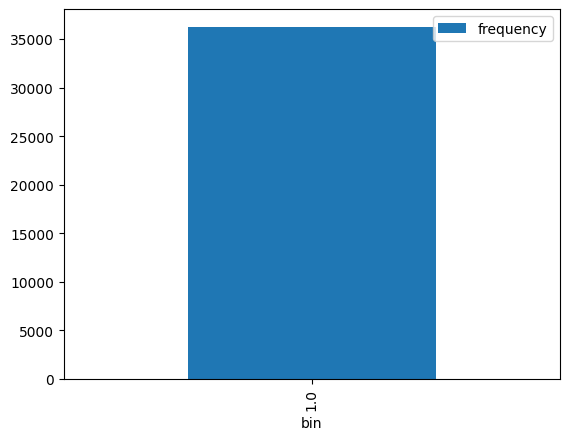

In [218]:
histogram = df.select("booking_status").rdd.flatMap(lambda x: x).histogram(10)
pd.DataFrame(
    list(zip(*histogram)),
    columns=['bin', 'frequency']
).set_index(
    'bin'
).plot(kind='bar');


Data Visualization during Evaluation
<a name="data-visualization-during-evaluation"></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.mllib.evaluation import MulticlassMetrics

In [ ]:
predictionAndLabels = optimal_trained_model.transform(df).select("prediction", "booking_status").rdd.map(lambda p: (float(p.prediction), float(p.booking_status)))

metrics = MulticlassMetrics(predictionAndLabels)

In [ ]:
# Confusion Matrix
confusion_matrix = metrics.confusionMatrix().toArray()
df_cm = pd.DataFrame(confusion_matrix, index = [i for i in "AB"],
                  columns = [i for i in "AB"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

## Conclusion
<a name="conclusion"></a>

In this project, we demonstrated the application of Deep Learning models using BigDL DLlib on Spark for a large-scale classification task. Our work incorporated all steps involved in a typical Machine Learning pipeline, including Data Acquisition, Preprocessing, Feature Engineering, Model Building, Parameter Tuning, and Evaluation. The chosen Deep Learning model demonstrated promising results on our data.

We must note that, despite the solid performance of our model, further improvements could potentially be achieved with more extensive hyperparameter tuning, consideration of different model architectures, or additional feature engineering.

Additionally, the project highlighted the powerful capabilities of Apache Spark in handling large datasets and performing distributed computing, making it an ideal choice for Big Data tasks. Furthermore, the integration of BigDL DLlib allowed us to leverage state-of-the-art Deep Learning techniques within the Spark ecosystem, presenting a potent combination of tools for advanced analytics and machine learning tasks.